In [61]:
import requests
import json
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np


# Creating a Function to call our API
def Api_call(symbol):
    url = "https://apidojo-yahoo-finance-v1.p.rapidapi.com/stock/v2/get-historical-data"
    querystring = {"frequency":"1d","filter":"history","period1":"1560643200","period2":"1592265600","symbol":symbol}
    headers = {
    'x-rapidapi-host': "apidojo-yahoo-finance-v1.p.rapidapi.com",
    'x-rapidapi-key': "ec9831563dmsh5c355f85927aba5p1ac11ajsn43d369039a77"
    }
    response = requests.request("GET", url, headers=headers, params=querystring)
    return response.json()
zm_stocks = Api_call("ZM")

In [62]:
## Creating a Dataframe & Convert Epoch dates to datetime
def Epoch_dates(zm_stocks):
    df= pd.DataFrame(zm_stocks['prices'], columns=['date','open', 'high','low','close','volume','adjclose',"high_low","price/share"])
    df['date'] = pd.to_datetime(df['date'], unit= 's')
    df['date'] = df['date'].dt.date
    cols = ["date",'open','high','low','close','volume',"high_low","price/share"]
    df = df[cols].round(2)
    return df

converted_dates = Epoch_dates(zm_stocks)
df_zm_stocks = Epoch_dates(zm_stocks)
df_zm_stocks

,date,open,high,low,close,volume,high_low,price/share
0,2020-06-15,227.84,239.59,226.38,239.02,13959100,NaN,NaN
1,2020-06-12,224.79,231.45,216.75,219.52,8766000,NaN,NaN
2,2020-06-11,219.18,232.00,218.50,222.07,17615800,NaN,NaN
3,2020-06-10,208.89,221.53,208.26,221.02,12241100,NaN,NaN
4,2020-06-09,209.83,210.59,202.93,205.43,7521800,NaN,NaN
...,...,...,...,...,...,...,...,...
247,2019-06-21,101.42,101.53,97.82,100.47,2972500,NaN,NaN
248,2019-06-20,105.01,107.34,101.62,102.30,2460700,NaN,NaN
249,2019-06-19,100.49,104.44,98.63,102.39,2592700,NaN,NaN
250,2019-06-18,100.39,102.00,97.51,99.64,2272400,NaN,NaN


In [63]:
## Adding columnns for Volatility & price/share
def v_ps_calculation(df):
    #Volatility high-low
    df["high_low"] = df["high"] - df["low"]
    #Price/share close/volume
    df["price/share"] = df["close"] / df["volume"]
    return df
v_ps_calculation(df_zm_stocks)

,date,open,high,low,close,volume,high_low,price/share
0,2020-06-15,227.84,239.59,226.38,239.02,13959100,13.21,0.000017
1,2020-06-12,224.79,231.45,216.75,219.52,8766000,14.70,0.000025
2,2020-06-11,219.18,232.00,218.50,222.07,17615800,13.50,0.000013
3,2020-06-10,208.89,221.53,208.26,221.02,12241100,13.27,0.000018
4,2020-06-09,209.83,210.59,202.93,205.43,7521800,7.66,0.000027
...,...,...,...,...,...,...,...,...
247,2019-06-21,101.42,101.53,97.82,100.47,2972500,3.71,0.000034
248,2019-06-20,105.01,107.34,101.62,102.30,2460700,5.72,0.000042
249,2019-06-19,100.49,104.44,98.63,102.39,2592700,5.81,0.000039
250,2019-06-18,100.39,102.00,97.51,99.64,2272400,4.49,0.000044


In [66]:
#zm_stocks = Api_call("ZM")
def Getstockprice_df(symbol):
    json = Api_call(symbol)
    df = Epoch_dates(json)
    data = v_ps_calculation(df)
    return data

#Getstockprice_df(df_zm_stocks)
zm_data = Getstockprice_df("ZM")
data

,date,open,high,low,close,volume,high_low,price/share
0,2020-06-15,227.84,239.59,226.38,239.02,13959100,13.21,0.000017
1,2020-06-12,224.79,231.45,216.75,219.52,8766000,14.70,0.000025
2,2020-06-11,219.18,232.00,218.50,222.07,17615800,13.50,0.000013
3,2020-06-10,208.89,221.53,208.26,221.02,12241100,13.27,0.000018
4,2020-06-09,209.83,210.59,202.93,205.43,7521800,7.66,0.000027
...,...,...,...,...,...,...,...,...
247,2019-06-21,101.42,101.53,97.82,100.47,2972500,3.71,0.000034
248,2019-06-20,105.01,107.34,101.62,102.30,2460700,5.72,0.000042
249,2019-06-19,100.49,104.44,98.63,102.39,2592700,5.81,0.000039
250,2019-06-18,100.39,102.00,97.51,99.64,2272400,4.49,0.000044


In [70]:
#Saving it to our pc to a JSON file
def json_saver(df):
    df = df_zm_stocks.to_json("../data_ber_project_pandas/zoom_shareprice.json")
    return df
json_saver(df_zm_stocks)

In [68]:
df_high_low = data["high_low"]
df_stocks_plot = data[["date","close","high_low"]]
df_stocks_plot

,date,close,high_low
0,2020-06-15,239.02,13.21
1,2020-06-12,219.52,14.70
2,2020-06-11,222.07,13.50
3,2020-06-10,221.02,13.27
4,2020-06-09,205.43,7.66
...,...,...,...
247,2019-06-21,100.47,3.71
248,2019-06-20,102.30,5.72
249,2019-06-19,102.39,5.81
250,2019-06-18,99.64,4.49


Text(0, 0.5, 'Share price USD')

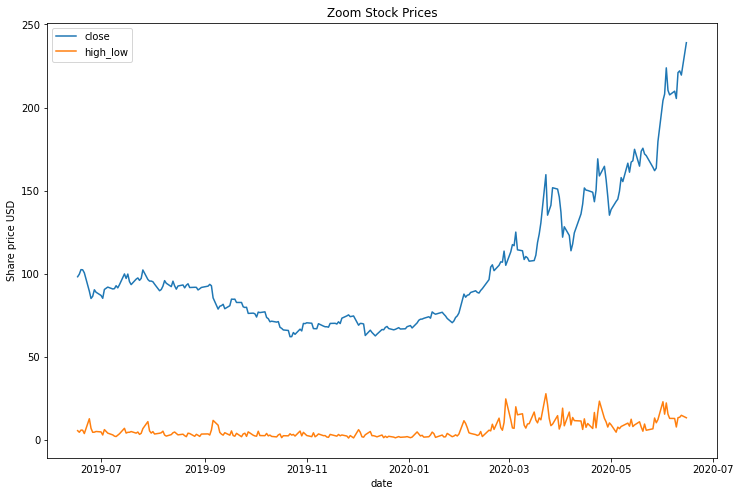

In [69]:
df_stocks_plot.set_index('date', inplace=True)
df_stocks_plot.plot(figsize=(12,8))
plt.title(label='Zoom Stock Prices')
plt.ylabel('Share price USD')
#plt.xlabel(data["close"])